# **Twitter Sentiment Analysis**
---



In [ ]:
# Import data structures
import pandas as pd
import numpy as np

# Import NLP/Text Pre-Processing Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import scikit learn ML Libraries
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Pre-Processing**



In [ ]:
pip install -U symspellpy


In [ ]:
from symspellpy.symspellpy import SymSpell

In [ ]:
# Create a set of stop words for O(1) access time in stop word removal
# stop_words = set(stopwords.words('english'))

# Try a different/smarter stop words list
#stop_words = set(stopwords.words('computer'))

In [ ]:
# Takes in a filename and list of column names and generates a corresponding
# Pandas dataframe
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [ ]:
# Takes in a Pandas dataframe and removes unwanted columns specified in the 
#cols list parameter passed in
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [ ]:
# Takes in tweet text and perform a series of natural language pre-processing
# operations on the tweet to prepare for training state of pipeline
def preprocess_tweet_text(tweet):
    # Turn all characters in tweet text to lowercase
    tweet = tweet.lower()

    # Remove unwanted urls and web addresses from tweet text
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

    # Remove user @ references and '#' from tweet text
    tweet = re.sub(r'\@\w+|\#','', tweet)

    # Remove all numbers from tweet text
    tweet = re.sub(r'[0-9]','', tweet)

    # Remove punctuations from tweet text
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Try segmenting/breaking up words combined into one word
    # e.g. "thecowjumpedoverthemoon" -> "the" "cow" "jumped" "over" "the" "moon"
    # result = sym_spell.word_segmentation(tweet)
    # tweet = result.corrected_string

    # Try tokenizing tweet text into individual words and removing stop words
    # tweet_tokens = word_tokenize(tweet)
    # filtered_words = [w for w in tweet_tokens if not w in stop_words]  
    # return " ".join(filtered_words)
    
    # Try spell correcting misspelled words
    # spell = SpellChecker()
    # spellchecked_words = []
    # for word in tweet.split():
        # Get the one `most likely` answer
        # spellchecked_words.append(spell.correction(word))
        # tweet = ' '.join(spellchecked_words)
    
    return tweet

In [ ]:
# Performs feature extraction by creating a term frequency - inverse document
# frequency (TF-IDF) feature vectorizer that is fit to the Pandas dataframe
# passed in
def get_feature_vector(train_fit):
  
    # Try unigram vectorization
    # vector = TfidfVectorizer(sublinear_tf=True)

    # Try unigram/bigram vectorization
    # vector = TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True)

    # Initialize unigram/bigram/trigram vectorizer and fit to data
    vector = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True)
    vector.fit_transform(train_fit)
    return vector

In [ ]:
# Convert integer representation of sentiment to string representation of
# sentiment
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
dataset = load_dataset("/content/drive/MyDrive/data.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
dataset = remove_unwanted_cols(dataset, ['t_id','created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)

In [ ]:
dataset

,target,text
0,0,upset that cant update his facebook texting ...
1,0,dived many times for the ball managed save ...
2,0,its not behaving all mad why here because ...
3,0,not the whole crew
4,0,need hug
...,...,...
1310101,1,just woke having school the best feeling ever
1310102,1,thewdbcom very cool hear old walt interviews...
1310103,1,are you ready for your mojo makeover ask for ...
1310104,1,happy birthday boo alll time tupac amaru s...


In [ ]:
dataset.to_csv('/content/drive/MyDrive/featured_data_new.csv', header=True)

# **Machine Learning Models and Performance**

## Feature Extraction


In [ ]:
# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Naive-Bayes Classifier



              precision    recall  f1-score   support

    Positive       0.79      0.82      0.81    131560
    Negative       0.81      0.78      0.80    130462

    accuracy                           0.80    262022
   macro avg       0.80      0.80      0.80    262022
weighted avg       0.80      0.80      0.80    262022



Text(0.5, 15.0, 'Predicted')

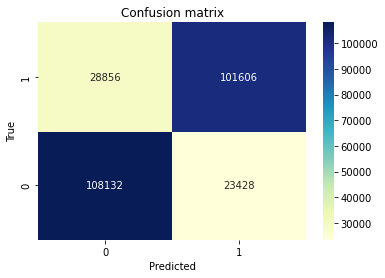

In [ ]:
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)

print(metrics.classification_report(y_test, y_predict_nb,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_nb)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## Logistic Regression




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    Positive       0.82      0.79      0.81    131560
    Negative       0.80      0.82      0.81    130462

    accuracy                           0.81    262022
   macro avg       0.81      0.81      0.81    262022
weighted avg       0.81      0.81      0.81    262022



Text(0.5, 15.0, 'Predicted')

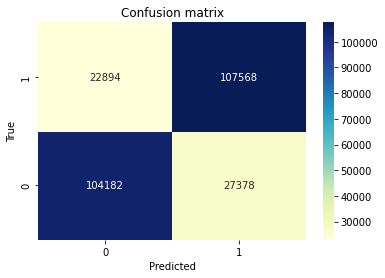

In [ ]:
# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs', C=2)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)

print(metrics.classification_report(y_test, y_predict_lr,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_lr)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Decision Tree:


In [ ]:
from sklearn.tree import DecisionTreeClassifier

hello
classifier
trained
predicted
              precision    recall  f1-score   support

    Positive       0.66      0.01      0.02    131560
    Negative       0.50      0.99      0.66    130462

    accuracy                           0.50    262022
   macro avg       0.58      0.50      0.34    262022
weighted avg       0.58      0.50      0.34    262022



Text(0.5, 15.0, 'Predicted')

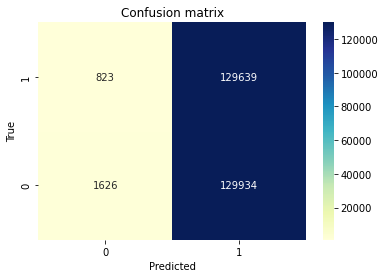

In [ ]:
# Training Decision Tree model
print("hello")
clf = DecisionTreeClassifier(max_depth=8, max_features="auto")
print("classifier")
clf.fit(X_train, y_train)
print("trained")
y_predict_dt = clf.predict(X_test)
print("predicted")

print(metrics.classification_report(y_test, y_predict_dt,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_dt)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
# Training Random Forest Model
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_predict_rf = clf.predict(X_test)

print(metrics.classification_report(y_test, y_predict_rf,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_rf)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
print("hello")
clf = AdaBoostClassifier(base_estimator=LR_model)
print("classifier")
clf.fit(X_train, y_train)
print("trained")
y_predict_abc = clf.predict(X_test)
print("predicted")

hello
classifier


In [ ]:
print(metrics.classification_report(y_test, y_predict_abc,target_names=['Positive', 'Negative']))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_abc)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Heatmap effect is added to confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
#Cleaned meaning - for ease, we had removed some unneccasry colums from the eval dataset. If trying on the normal evaluation data, you can use the code below (commented):
'''
dataset = load_dataset("twitter_sentiments_evaluation.csv", ['tweet_index', 'created_at', 'query', 'user', 'tweet'])
# Remove unwanted columns from dataset
test_ds = remove_unwanted_cols(dataset, ['created_at', 'query', 'user'])
#test_ds = remove_unwanted_cols(test_ds, ["time_stamp", "user"])
'''

test_file_name = "/content/drive/MyDrive/evaluation_cleaned.csv" 
test_ds = load_dataset(test_file_name, ["tweet_index", "tweet"])
#test_ds = remove_unwanted_cols(test_ds, ["time_stamp", "user"])
# Creating text feature
test_ds.text = test_ds["tweet"].apply(preprocess_tweet_text)
test_feature = tf_vector.transform(np.array(test_ds.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# Averaging out the hashtags result
test_result_ds = pd.DataFrame({'tweet_index': test_ds.tweet_index, 'target':test_prediction_lr})
#test_result = test_result_ds.groupby(['hashtag']).max().reset_index()
test_result_ds.columns = ['tweet_index', 'target']
test_result_ds.predictions = test_result_ds['target']
test_result_ds = test_result_ds.set_index('tweet_index')

print(test_result_ds)
test_result_ds.to_csv('test_predictions_newnewnewnewnew.csv', header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


             target
tweet_index        
1467810369        0
1467811184        0
1986106482        0
2324660036        0
1467811594        1
...             ...
1964021414        1
2014990392        0
2014990424        1
2014990586        1
2190808431        1

[289834 rows x 1 columns]
